In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
mpl.rcParams['font.sans-serif'] = [u'WenQuanYi Zen Hei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
path = 'datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x_prime = data[list(range(4))]
y = pd.Categorical(data[4]).codes

特征：   花萼长度  +  花萼宽度
	预测正确数目： 127
	准确率: 84.67%
特征：   花萼长度  +  花瓣长度
	预测正确数目： 148
	准确率: 98.67%
特征：   花萼长度  +  花瓣宽度
	预测正确数目： 146
	准确率: 97.33%
特征：   花萼宽度  +  花瓣长度
	预测正确数目： 146
	准确率: 97.33%
特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 149
	准确率: 99.33%


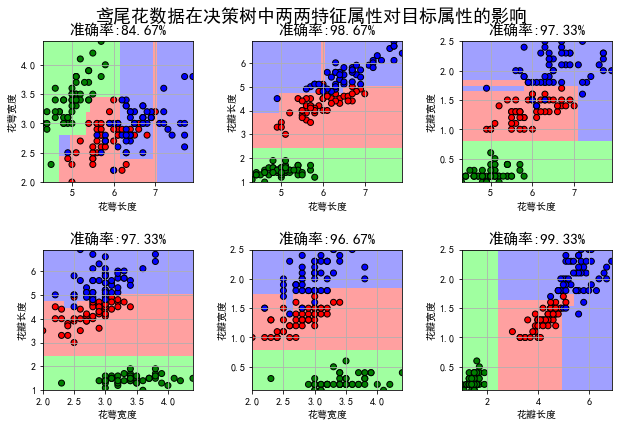

In [4]:
#进行特征比较
feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(9, 6), facecolor='w')
for i, pair in enumerate(feature_pairs):
#获取数据
    x = x_prime[pair]
#决策树学习
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
    clf.fit(x, y)
    
    y_hat = clf.predict(x)
    score = clf.score(x, y)
    y2 = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)   #统计预测正确的个数
    print ('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]])
    print ('\t预测正确数目：', c)
    print ('\t准确率: %.2f%%' % (score*100))

    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.dstack((x1.flat, x2.flat))[0]  # 测试点
    

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=10)
    plt.ylabel(iris_feature[pair[1]], fontsize=10)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
    plt.title(u'准确率:%.2f%%' % (score * 100), fontdict={'fontsize':15})
plt.suptitle(u'鸢尾花数据在决策树中两两特征属性对目标属性的影响', fontsize=18, y = 1)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()